## Sales Analysis

#### Libraries

In [110]:
import pandas as pd
import os
import glob
import datetime as dt
import matplotlib.pyplot as plt

#### Merging 12 months of sales data into a single file

In [128]:
files = [file for file in os.listdir('C:/Python_notebooks/Data-Science-Projects/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

In [129]:
all_months_data = pd.DataFrame()

In [130]:
for file in files:
    df = pd.read_csv('C:/Python_notebooks/Data-Science-Projects/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])

In [131]:
all_months_data.to_csv("all_data.csv", index = False)

In [132]:
all_data = pd.read_csv("all_data.csv")

In [133]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [134]:
all_data = all_data.drop(all_data.index[1])

In [135]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186849 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


#### Checking NA's

In [136]:
nan_df = all_data[all_data.isna().any(axis =1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
1571,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
all_data = all_data.dropna(how = 'all')

#### Question 1: What was the best month for sales? How much was earned that month?

##### Extracting month number from order date

In [138]:
all_data['Month'] = all_data['Order Date'].str[:2]

In [139]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
count,186305,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788,13
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address,12
freq,355,21903,168552,21903,355,355,24984


##### Cleaning data

In [140]:
all_data[all_data['Quantity Ordered'] == 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [141]:
all_data = all_data[all_data['Quantity Ordered'] != 'Quantity Ordered']

In [142]:
all_data['Quantity Ordered'].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [143]:
all_data['Price Each'].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)

In [144]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')

In [145]:
all_data['Price Each'] = all_data['Price Each'].astype('float')

##### Revenue column = Qty * Price

In [146]:
all_data['Revenue'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [147]:
all_data.groupby('Month').sum()['Revenue'].sort_values(ascending = False)

Month
12    4613443.34
10    3736726.88
04    3390670.24
11    3199603.20
05    3152606.75
03    2807100.38
07    2647775.76
06    2577802.26
08    2244467.88
02    2202022.42
09    2097560.13
01    1822256.73
Name: Revenue, dtype: float64

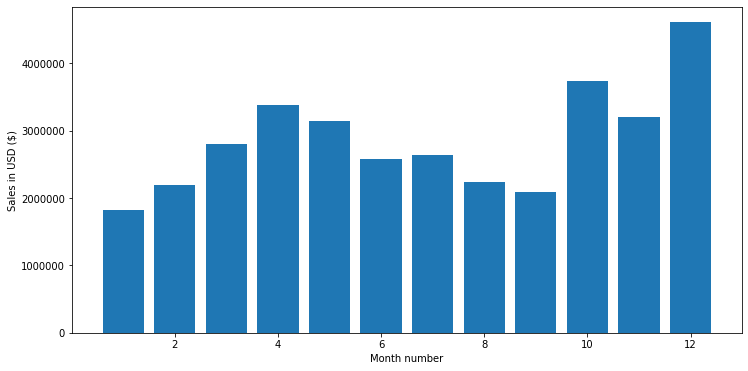

In [148]:
plt.figure(figsize = (12,6))
plt.bar(range(1,13),  all_data.groupby('Month').sum()['Revenue'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.ticklabel_format(style='plain')

#### Question 2: What city had the highest number of sales?

In [149]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


##### Extracting city & state

In [182]:
all_data['City'] = all_data['Purchase Address'].str.split(", ", expand=True)[1]

In [183]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles


In [199]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]

In [202]:
all_data['City&State'] = all_data['City'] + ' ' + all_data['Purchase Address'].apply(lambda x: get_state(x))

In [203]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue,City,City&State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles,Los Angeles CA


In [184]:
all_data.groupby('City').sum()['Revenue'].sort_values(ascending = False)

City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Revenue, dtype: float64

In [187]:
all_data.groupby('City').sum()['Revenue'].index

Index(['Atlanta', 'Austin', 'Boston', 'Dallas', 'Los Angeles', 'New York City',
       'Portland', 'San Francisco', 'Seattle'],
      dtype='object', name='City')

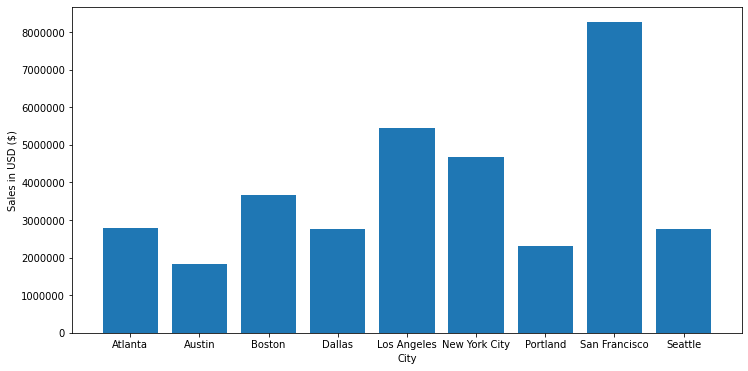

In [206]:
plt.figure(figsize = (12,6))
plt.bar(all_data.groupby('City').sum()['Revenue'].index,  all_data.groupby('City').sum()['Revenue'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.ticklabel_format(style='plain', axis='y')

In [204]:
all_data.groupby('City&State').sum()['Revenue'].sort_values(ascending = False)

City&State
San Francisco CA    8262203.91
Los Angeles CA      5452570.80
New York City NY    4664317.43
Boston MA           3661642.01
Atlanta GA          2795498.58
Dallas TX           2767975.40
Seattle WA          2747755.48
Portland OR         1870732.34
Austin TX           1819581.75
Portland ME          449758.27
Name: Revenue, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

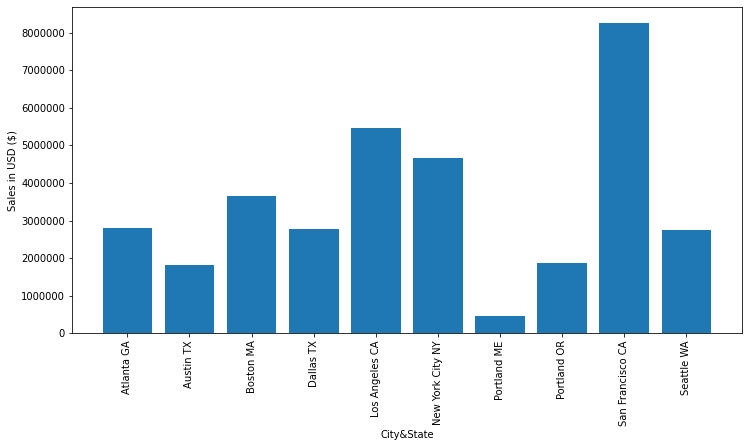

In [208]:
plt.figure(figsize = (12,6))
plt.bar(all_data.groupby('City&State').sum()['Revenue'].index,  all_data.groupby('City&State').sum()['Revenue'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City&State')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = 'vertical')

#### Question 3: What time should we display advertisements to maximise likelihood of customer's buying product? 